# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

In [3]:
shape_tup=df.shape

In [4]:
print("The data has", shape_tup[0], "rows, and", shape_tup[1], "columns")

The data has 1898 rows, and 9 columns


### Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Missing values

In [6]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no NaNs in the data

### Statistical Summary

In [7]:
df["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


Food preparation time summary:
- min: 20 mins
- avg: 27.4 mins
- max: 35 mins

### Rated Orders

In [8]:
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [9]:
df["rating"].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#### Observations:
736 orders are not rated, which corresponds to the 38,8% of the data


### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
#for loop to check how many unique values are in each column:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].nunique())

---- order_id ---
1898
---- customer_id ---
1200
---- restaurant_name ---
178
---- cuisine_type ---
14
---- cost_of_the_order ---
312
---- day_of_the_week ---
2
---- rating ---
4
---- food_preparation_time ---
16
---- delivery_time ---
19


- Each order has an unique ID
- Some customers have several orders
- there are 178 Restaurants within our data

## Cuisine Type

<Axes: xlabel='cuisine_type', ylabel='count'>

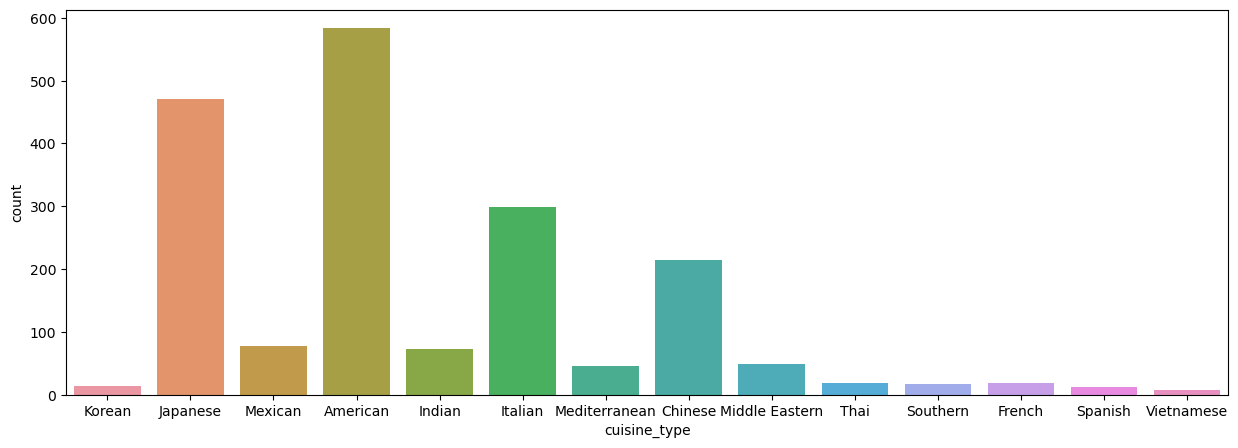

In [11]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

#### The top Three Cuisine type are:
1. American
2. Japanese
3. Italian

## Cost of the Order

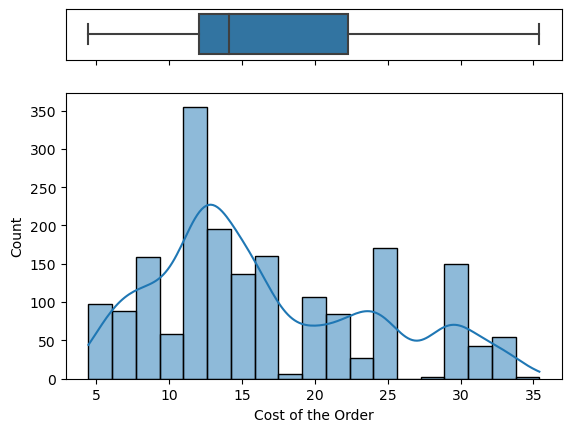

In [12]:
# Setting up a figure with two subplots
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["cost_of_the_order"], ax=ax_box, orient="h")
sns.histplot(data=df, x="cost_of_the_order", ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='',yticks=[])
ax_box.tick_params(left = False)
ax_hist.set(xlabel="Cost of the Order")
plt.show()

The cost of the order distibution is right skewed and bimodal, most of the orders are between 11 and 16 usd.

Text(0.5, 0, 'Day of the Week')

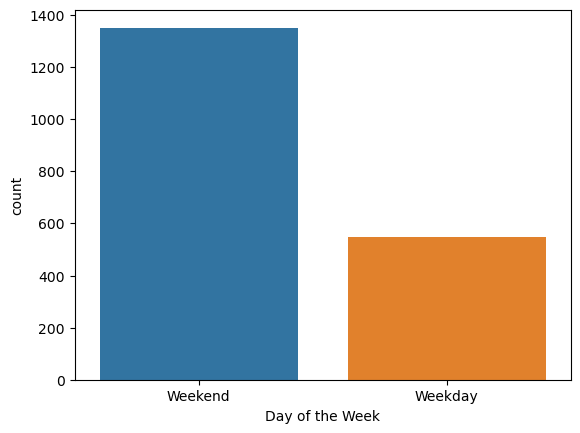

In [13]:
ax_count=sns.countplot(data=df, x="day_of_the_week")
ax_count.set_xlabel("Day of the Week")


In [14]:
df["day_of_the_week"].value_counts(normalize=True)

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64

There are more orders on weekends (71,2%) than on weekdays (28,8%)

### Rating

In [15]:
df["rating"].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

Text(0.5, 0, 'Rating')

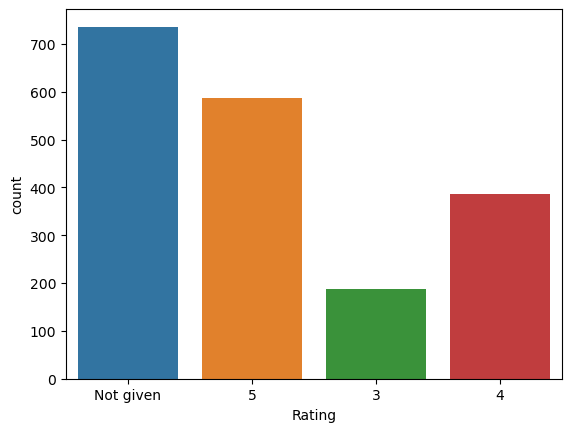

In [16]:
ax_cr=sns.countplot(data=df, x="rating")
ax_cr.set_xlabel("Rating")

Rating should be encouraged by food hub to improve the feedback system, 38,7% of the orders are not rated.

### Food preparation time

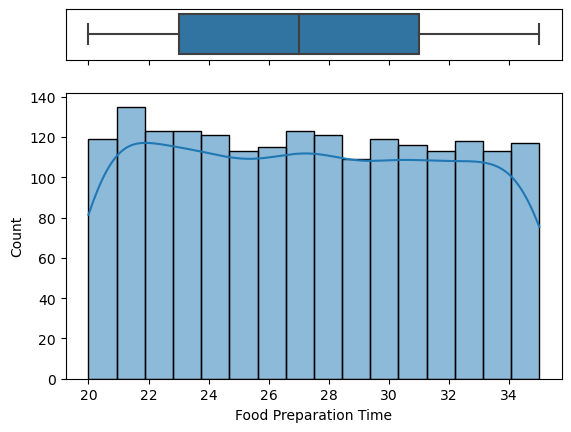

In [17]:
# Setting up a figure with two subplots (axes)
f
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["food_preparation_time"], ax=ax_box, orient="h")
sns.histplot(data=df, x="food_preparation_time", ax=ax_hist, kde=True, bins=16)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='',yticks=[])
ax_box.tick_params(left = False)
ax_hist.set(xlabel="Food Preparation Time")
plt.show()

Food preparation time has an uniform like distibution, the mode is in 21 minutes

### Delivery Time

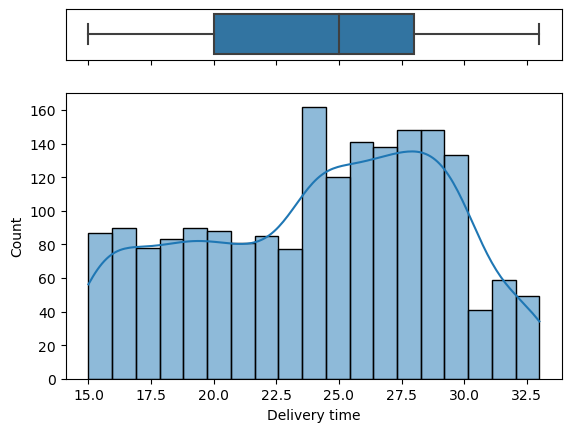

In [18]:
# Setting up a figure with two subplots (axes)
f
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["delivery_time"], ax=ax_box, orient="h")
sns.histplot(data=df, x="delivery_time", ax=ax_hist, kde=True, bins=19)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='',yticks=[])
ax_box.tick_params(left = False)
ax_hist.set(xlabel="Delivery time")
plt.show()

Delivery time distribution is mildly skewed to the left, the mean is on 25 minutes.

### Top 5 restaurants

In [19]:
top_five_rest=df["restaurant_name"].value_counts()
top_five_rest=top_five_rest[0:5]
top_five_rest=top_five_rest.index
top_five_rest=top_five_rest.to_list()

In [20]:
# Boolean indexing to filter rows where 'restaurant_name' is in the top_five_rest list
filtered_df = df[df['restaurant_name'].isin(top_five_rest)]

# Get the cuisine type of the top five restaurants
gdf=filtered_df.groupby(df['restaurant_name'])["cuisine_type"].first()
gdf.head()


restaurant_name
Blue Ribbon Fried Chicken    American
Blue Ribbon Sushi            Japanese
Parm                          Italian
Shake Shack                  American
The Meatball Shop             Italian
Name: cuisine_type, dtype: object

#### Observations: The top five restaurant with its correspondent cuisine type
1. Shake Shack                -  219 -   American
2. The Meatball Shop          -  132 -  Italian
3. Blue Ribbon Sushi          -  119 -   Japanese
4. Blue Ribbon Fried Chicken   -  96 -  American
5. Parm                        -  68 -  Italian

### Weekend popularity

In [21]:
week_df = df[df['day_of_the_week']=="Weekend"]

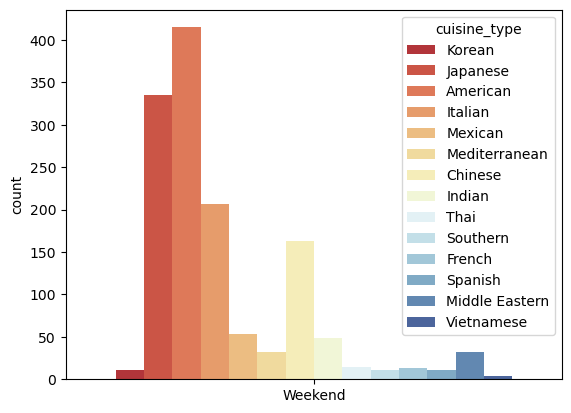

In [22]:
custom_palette = sns.color_palette("Dark2", 9)
ax_wk = sns.countplot(data=week_df, x="day_of_the_week", hue="cuisine_type", palette='RdYlBu')
ax_wk.set_xlabel("")

# Show the plot
plt.show()

#### Observations:
The most popular cuisine on weekends is American cuisine


### Orders that cost more than 20 USD

In [23]:
greater_20 = df[df['cost_of_the_order']>20].count()
percent_20=(greater_20[0]/shape_tup[0])*100
print("The percentage of orders with a higher cost than 20 dollars is", round(percent_20,2),"%")

The percentage of orders with a higher cost than 20 dollars is 29.24 %


### Mean delivery time

In [24]:
mean_dtime=df["delivery_time"].mean()
print("The mean delivery time is", round(mean_dtime,2), "minutes")

The mean delivery time is 24.16 minutes


### If the company decided to give 20% discount vouchers to the top 3 most frequent customers. Which are the IDs of these customers and the number of orders they placed

In [25]:
top_3_cust=df["customer_id"].value_counts()
top_3_cust[0:3]

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
Top customer IDs with number of orders
1. 52832    #orders:13
2. 47440   #orders 10
3. 83287    #orders 9


### Multivariate Analysis

c:\Users\Olger\anaconda3\envs\regdatascience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


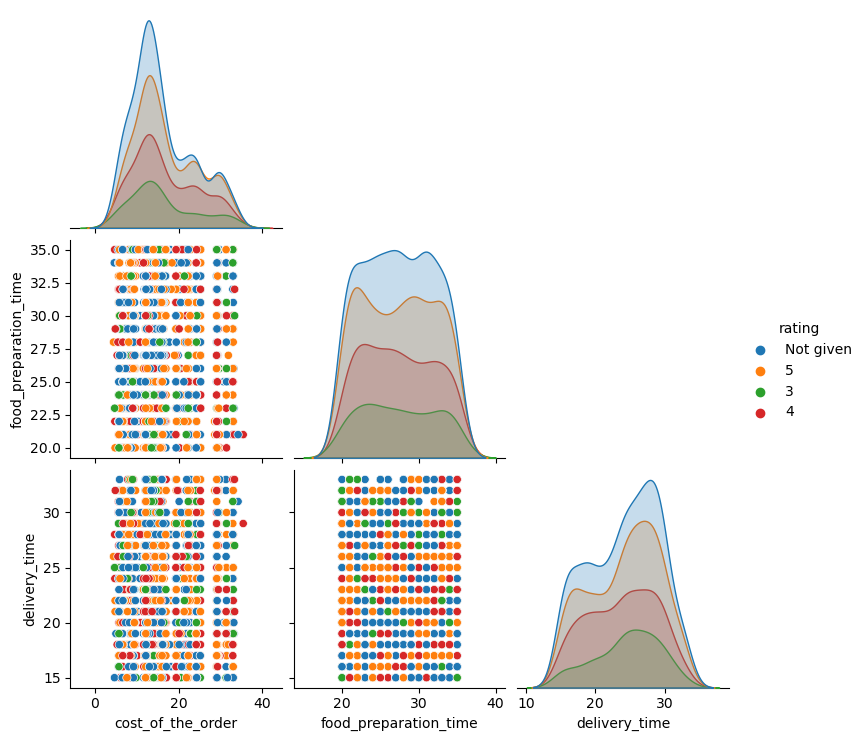

In [26]:
sns.pairplot(data=df[['cost_of_the_order', 'food_preparation_time','delivery_time','rating']], corner=True, hue='rating')

There is no significant correlation, because the data distribution is almost uniform.

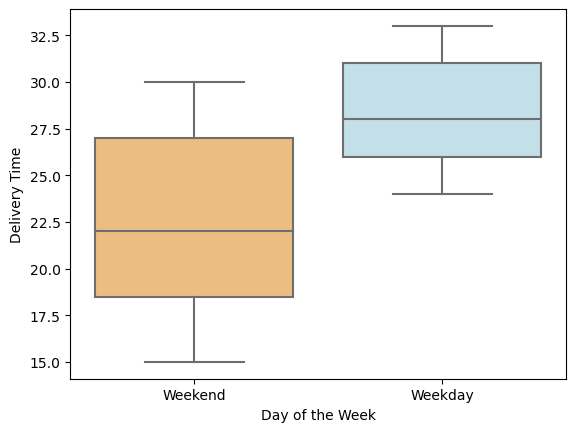

In [27]:
q12a=sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='RdYlBu') 
q12a.set_xlabel("Day of the Week")
q12a.set_ylabel("Delivery Time")
plt.show()

In general, on weekdays there is less dispersion and the delivery time is higher.

In [28]:
#Sort the values by rating for a better visualization experience
sorted_dfq12 = df.sort_values(by="rating")

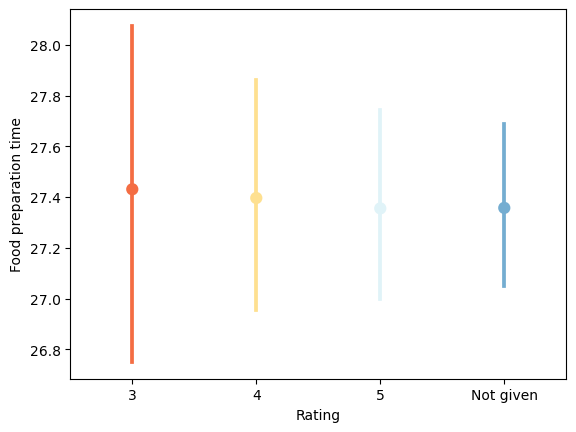

In [29]:
q12b=sns.pointplot(data=sorted_dfq12, x='rating', y='food_preparation_time',palette = 'RdYlBu')
q12b.set_xlabel("Rating")
q12b.set_ylabel("Food preparation time") 
plt.show()

There is no significant relation between rating and food preparation time.

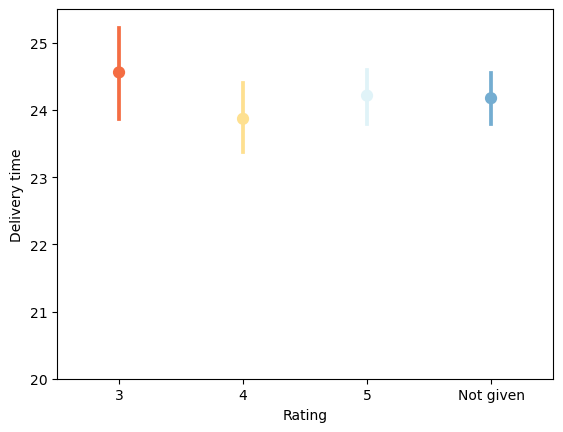

In [30]:
q12ba=sns.pointplot(data=sorted_dfq12, x='rating', y='delivery_time',palette = 'RdYlBu')
q12ba.set_xlabel("Rating")
q12ba.set_ylabel("Delivery time") 
plt.ylim(20,25.5)
plt.show()

There is a little difference between rating 3 and 4, of about 30 seconds, but it is not significant

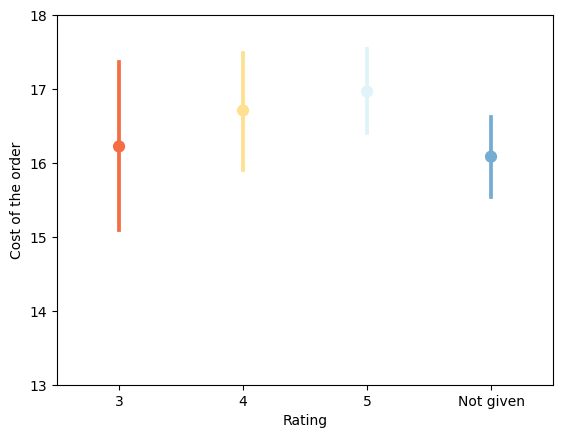

In [31]:
q12bb=sns.pointplot(data=sorted_dfq12, x='rating', y='cost_of_the_order',palette = 'RdYlBu')
q12bb.set_xlabel("Rating")
q12bb.set_ylabel("Cost of the order") 
plt.ylim(13,18)
plt.show()

Ratings are slightly higher when as the cost of the order increases.

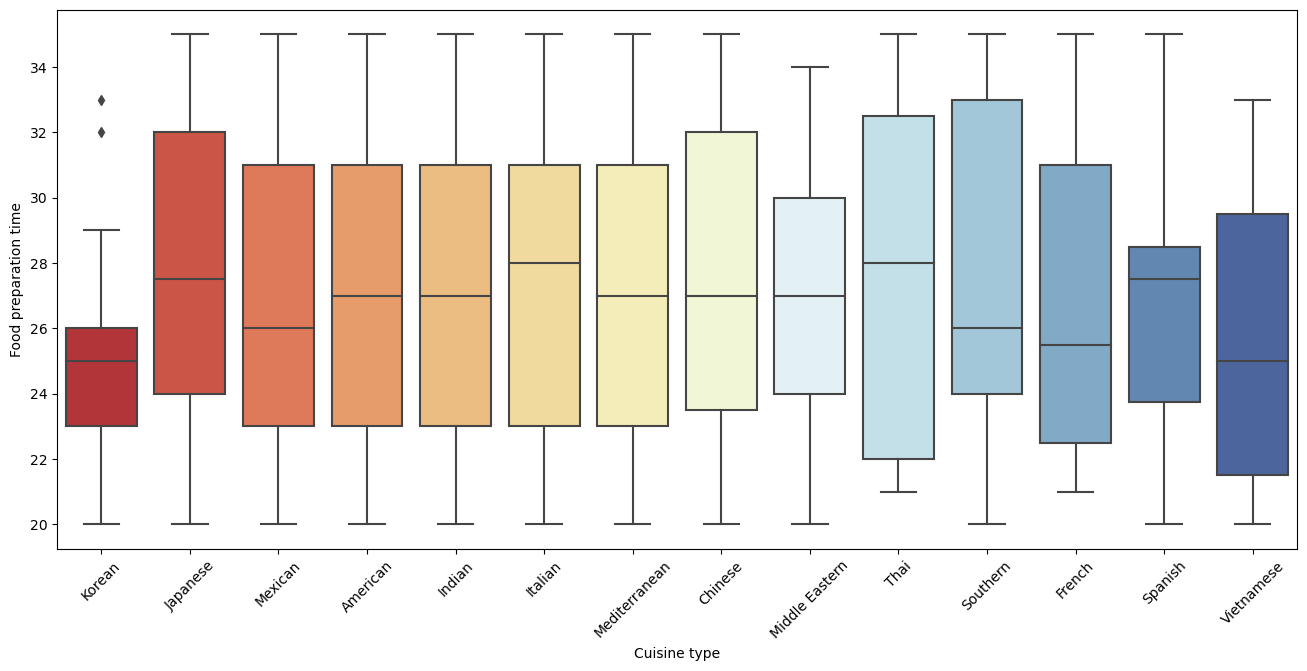

In [32]:

plt.figure(figsize=(16,7))
q12c=sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time',palette = 'RdYlBu') 
q12c.set_xlabel("Cuisine type")
q12c.set_ylabel("Food preparation time")
plt.xticks(rotation=45)
plt.show()

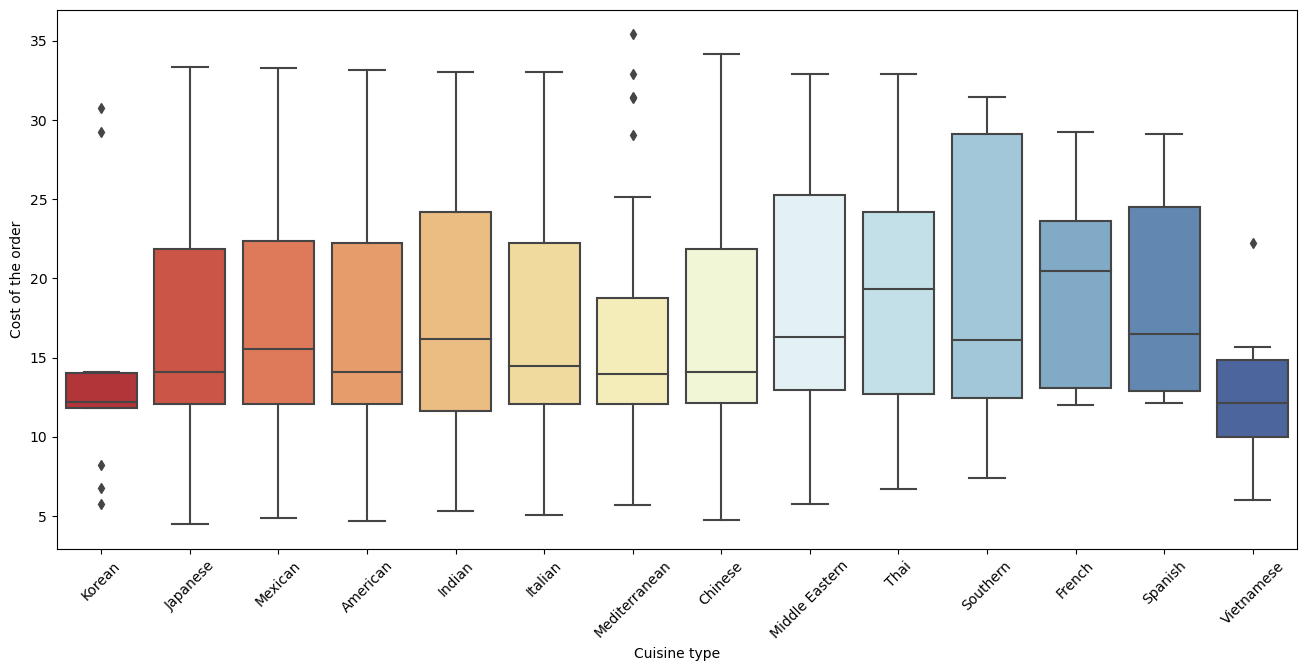

In [33]:

plt.figure(figsize=(16,7))
q12d=sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='RdYlBu') 
q12d.set_xlabel("Cuisine type")
q12d.set_ylabel("Cost of the order")
plt.xticks(rotation=45)
plt.show()

In [34]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. What restaurants fulfill the criteria to get the promotional offer

In [35]:
# Filter out the 'Not given' rating
rated_df=df[df['rating']!='Not given'].copy()
# Convert the ratings in rating column to int
rated_df['rating']= rated_df['rating'].astype('int')

In [36]:
#create dataframe with ratings counted by restaurant name
cr_df=rated_df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
cr_df.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [37]:
# Get the restaurant names with more than 50 ratings
rest_names=cr_df[cr_df['rating']>50]['restaurant_name']
#print(rest_names)

In [38]:
#create dataframe to get only the data of the restaurants where rating count>50
mean_r_df = rated_df[rated_df['restaurant_name'].isin(rest_names)]
# get the mean for each restaurant
mean_r_df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().round(2)

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:
Those 4 restaurants are the only ones that fit 


### Net revenue generated by the company across all orders

In [39]:
#define a function to calculate generated revenue
def gen_rev(x):
    if x>20:
        return x*0.25
    elif x>5:
        return x*0.15
    else:
        return x*0
    
#apply the function to the dataframe and create a column called revenue
df['revenue']=df['cost_of_the_order'].apply(gen_rev)

#Get the total revenue
rev_total=df['revenue'].sum().round(2)

print("Total revenue is",rev_total, "dollars")

Total revenue is 6166.3 dollars


### Percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [40]:
#Create a column to calculate total time
df['total_time']=df['delivery_time']+df['food_preparation_time']
#Filter the data
df_60=df[df['total_time']>60]
more_60=df_60.shape
percent_60=more_60[0]/shape_tup[0]
print("The percentage of orders with total delivery time greater than 60 minutes is",round(percent_60*100,2),"%")

The percentage of orders with total delivery time greater than 60 minutes is 10.54 %


In [41]:
sorted_dfq15 = df.sort_values(by="rating")
sorted_dfq15.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
1580,1476608,297674,Burger Joint,American,7.81,Weekend,3,33,24,1.1715,57
274,1477057,390490,Blue Ribbon Brooklyn,American,22.85,Weekend,3,23,19,5.7125,42
275,1477926,72639,P.J. Clarke's,American,12.18,Weekend,3,22,28,1.8270,50
1046,1477279,35432,TAO,Japanese,16.15,Weekend,3,24,22,2.4225,46
1495,1476680,44472,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,3,35,15,1.8120,50


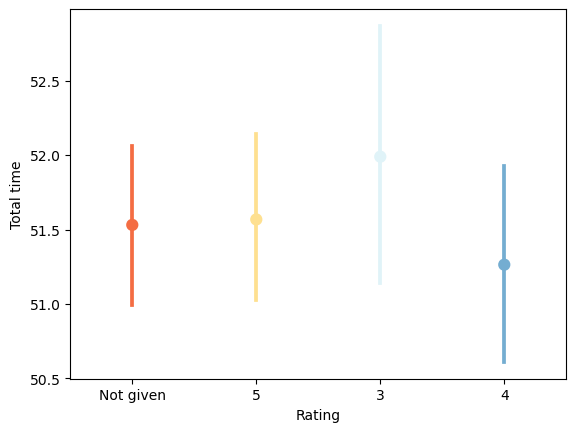

In [42]:
q15=sns.pointplot(data=df, x='rating', y='total_time',palette = 'RdYlBu')
q15.set_xlabel("Rating")
q15.set_ylabel("Total time") 
plt.show()

In [43]:
print(df['total_time'].max()-df['total_time'].min())



33


### Delivery time variation: weekdays and weekends

In [44]:
#Get the means on delivery time for weekdays and weekends
mean_dtime_wkd=df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_dtime_wkend=df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print("The mean delivery time on weekdays is around", round(mean_dtime_wkd,2),"minutes, and the mean delivery time on weekends is around",round(mean_dtime_wkend,2),"minutes")

The mean delivery time on weekdays is around 28.34 minutes, and the mean delivery time on weekends is around 22.47 minutes


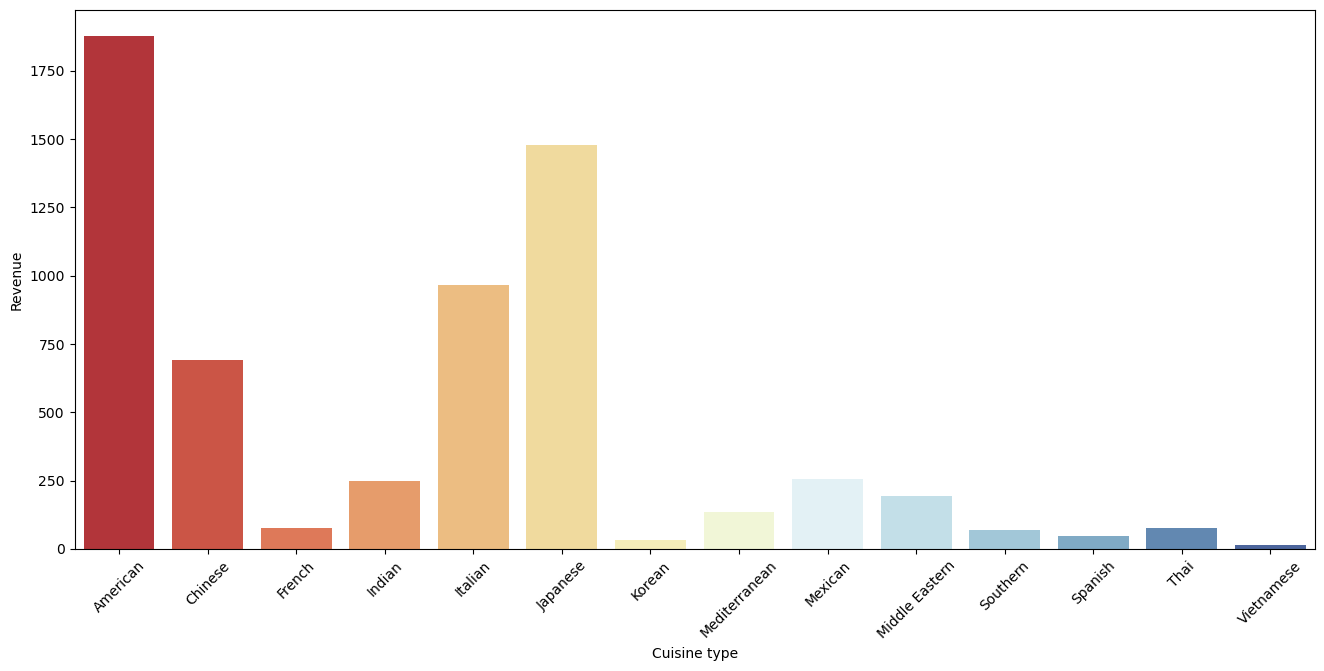

In [45]:
# Calculate revenues for each group
rev_by_cuisine = df.groupby('cuisine_type')['revenue'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(16, 7))
q15 = sns.barplot(x='cuisine_type', y='revenue', data=rev_by_cuisine, palette='RdYlBu')
q15.set_xlabel("Cuisine type")
q15.set_ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

### Conclusion and Recommendations

### Conclusions:
* The top four cuisine types are American, Japanese, Chinese and Italian.
* The amount of orders on weekends is more than twice than on weekdays.
* Delivery time is higher on weekdays than on weekends.
* The company is missing a lot of feedback since almost 40% of orders are not rated.
* There is little variability in total delivery time, and surprisingly it is not variating correspondingly with rating.

### Recommendations:

* The company should promote the rating behaviour within its clients to improve the analisys reach.
* Indian, Mexican and mediterranean show potential to improve sales, the company may engage with those restaurants to improve marketing strategies.
* Also the company can encourage those restaurants of the top four cuisine types to improve sales, changing the revenue politics for short periods of time, or for some specific dishes.


---